In [2]:
#Importing the Modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
dataset=pd.read_csv(r'C:\Users\My PC\Desktop\headbrain.csv')
dataset.shape

(237, 4)

In [4]:
#Analyzing the Dataset
dataset.head(5)

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [5]:
dataset.tail(5)

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170
236,2,2,3391,1120


In [6]:
dataset.describe()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


In [7]:
X=dataset["Head Size(cm^3)"].values
Y=dataset["Brain Weight(grams)"].values

In [8]:
print("The mean of the Head Size Values is %r" %(np.mean(X)))
print("The mean of the Brain Weight Values is %r" %(np.mean(Y)))
print("The total number of values available are %r" %(len(X)))

The mean of the Head Size Values is 3633.9915611814345
The mean of the Brain Weight Values is 1282.873417721519
The total number of values available are 237


## Using Traditional Mathematics to derive a Model 

In [9]:
mean_X=np.mean(X)
mean_Y=np.mean(Y)
length=len(X)
numerator=0
denominator=0
for i in range(length):
    numerator+=(X[i]-mean_X)*(Y[i]-mean_Y)
    denominator+=(X[i]-mean_X)**2
b1=numerator/denominator
b0=mean_Y-(b1*mean_X)
print("The two coefficients are %r and %r" %(b1,b0))

The two coefficients are 0.26342933948939945 and 325.57342104944223


That means Brain Weight=0.26342933948939945 + 325.57342104944223 * HeadSize which is our Linear Model

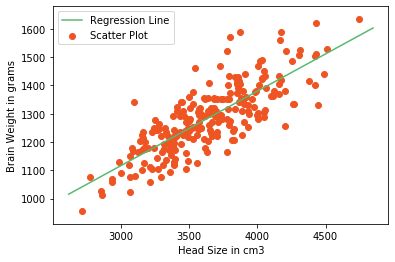

In [10]:
max_x = np.max(X) + 100
min_x = np.min(X) - 100

# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x

# Ploting Line
plt.plot(x, y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')

plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

In [11]:
# Calculating Root Mean Squared Error

rmse = 0
for i in range(length):
    y_pred = b0 + b1 * X[i]
    rmse += (Y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/length)
print(rmse)

72.1206213783709


## Using Scikit-Learn Machine Learning Library Approach

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
linear=LinearRegression()

In [13]:
X=X.reshape(length,1)
linear=linear.fit(X,Y)
Y_pred=linear.predict(X)

In [14]:
# Calculating the Root-Mean Squared Error
mse=mean_squared_error(Y,Y_pred)
rmse=np.sqrt(mse)
print(rmse)

72.1206213783709


# END of the CODE